# Mechanical Machine Failures Predictive Maintenance Dataset Data Set

# Attribute Information:

The dataset consists of 10000 data points stored as rows with 14 features in columns:-
    
UID: unique identifier ranging from 1 to 10000
    
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
    
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
    
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
    
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
    
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
    
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. 
    
machine_failure: 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.


# The machine failure consists of five independent failure modes:-

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 to 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

In [1]:
 # import libraries required for data Analysis
import pandas as pd                      
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sidetable
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
mf =  pd.read_csv(r"D:\pandas\machine_failures.csv")

In [3]:
# to check the first five fields
mf.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
#  to check the last five fields
mf.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
# to check the shape of Dataset
mf.shape

(10000, 14)

In [6]:
# to check all the Attributes
mf.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
# count unique values of each features
mf.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [8]:
# check the missing values in all columns
mf.isnull().sum()[mf.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
# encode  the non_numerical column to numerical.
mf.Type.replace({'L':0,'M':1,'H':2},inplace=True)

In [10]:
# statistical distribution for numerical attributes
mf.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Type,10000.0,0.50030,0.671301,0.0,0.00,0.0,1.00,2.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0


# Hitmap : 
is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.

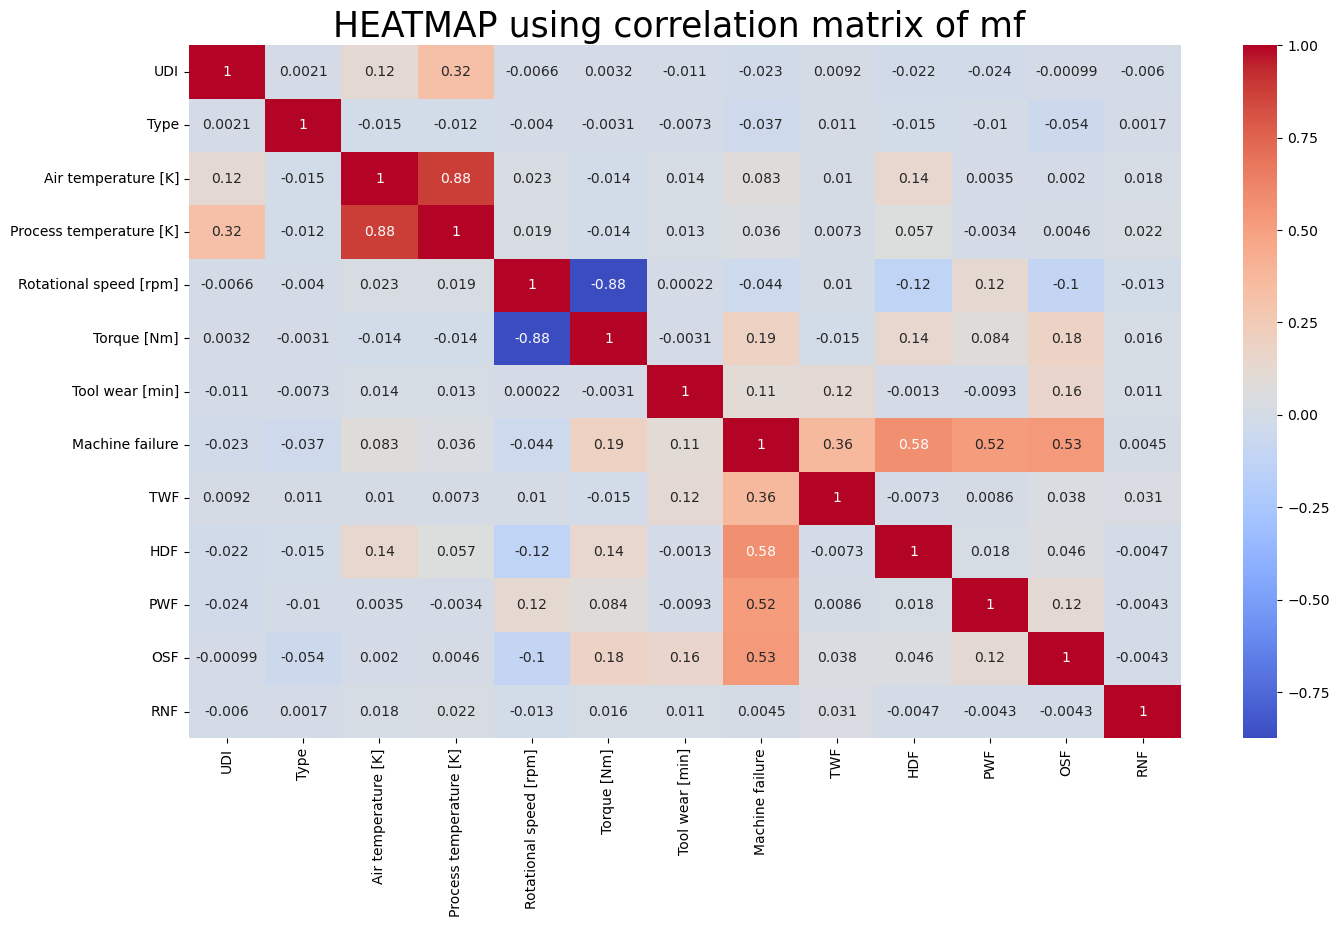

In [11]:
plt.figure(figsize=(16,9))                                      # heatmap size in ratio 16:9
sns.heatmap(mf.corr(), annot=True,cmap='coolwarm')               # show heatmap
plt.title("HEATMAP using correlation matrix of mf ",fontsize = 25)
plt.show()

In [12]:
# drop the columns which is unique id column
# drop the column which does not give any important information to us.

mf = mf.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'],axis=1)

# Outliers Detection
Lower range limit = Q1 – (1.5* IQR). Essentially this is 1.5 times the inner quartile range subtracting from your 1st quartile. Higher range limit = Q3 + (1.5*IQR)

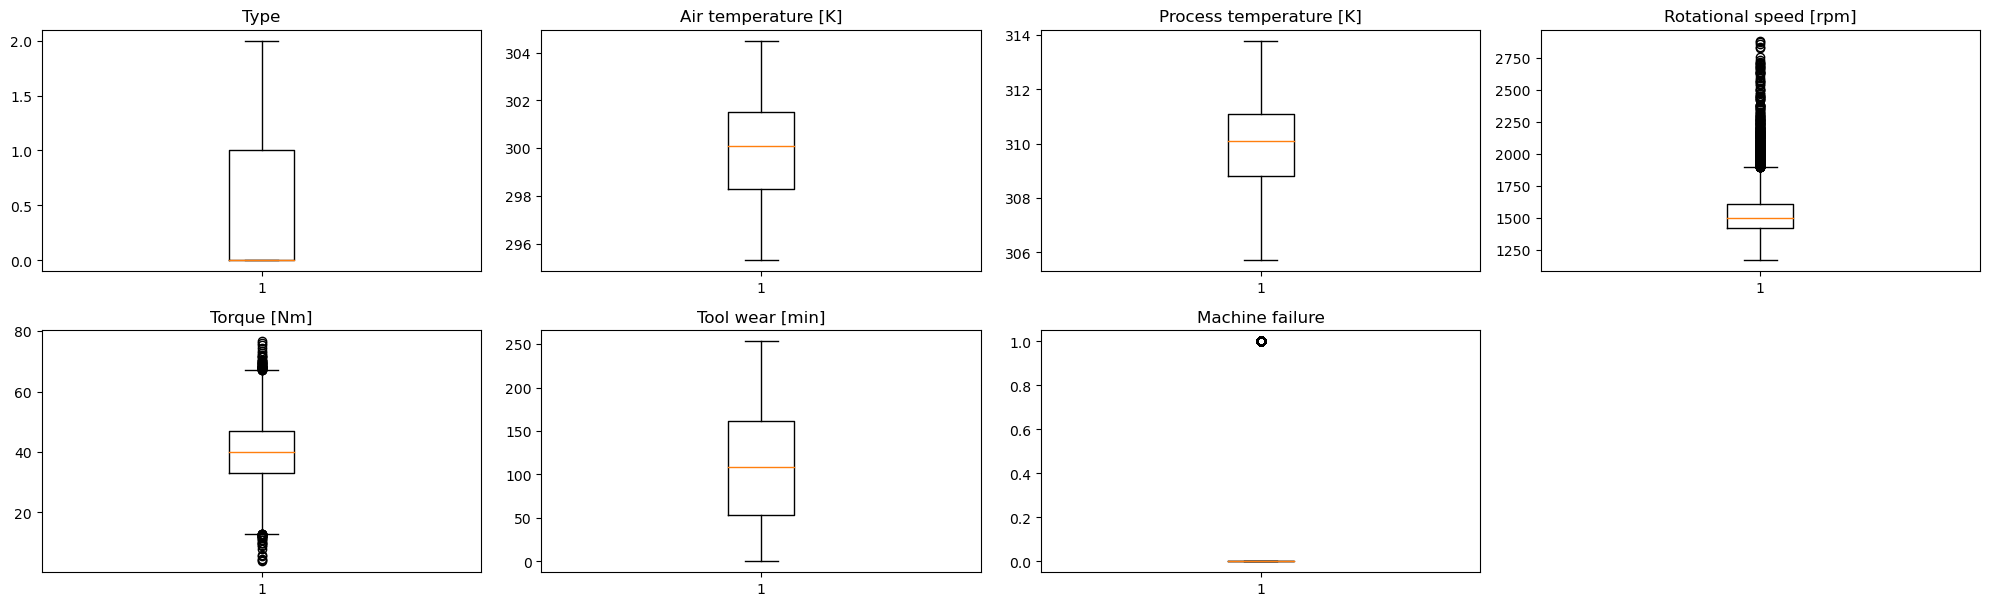

In [13]:
plt.figure(figsize=(20,30))  # width & Height

for i, variable in enumerate(mf):
                     plt.subplot(10,4,i+1) # 10-rows ,4-col, i+1-current iteration index
                     plt.boxplot(mf[variable],whis=1.5) #The whis parameter sets the whisker length to 1.5 times the interquartile range (IQR) for outlier detection.
                     plt.tight_layout()    # is used to improve the spacing between subplots
                     plt.title(variable)   #  sets the title of each subplot to the name of the variable.
                    
plt.show()   #is called to display the figure with all the subplots.

# Rotational speed [rpm]

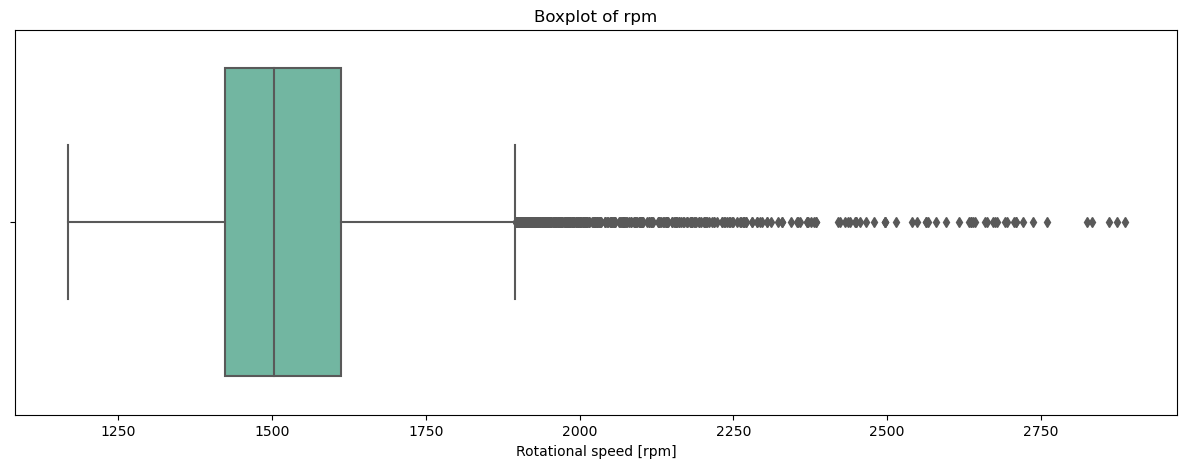

In [14]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Rotational speed [rpm]', data = mf, palette = 'Set2')# This sets the color palette for the boxplot. The 'Set2' palette is one of the predefined palettes in Seaborn.
plt.title('Boxplot of rpm')
plt.show()

In [15]:
Q1_rpm = mf.describe()['Rotational speed [rpm]']['25%']
# calculates the first quartile (25th percentile) of the 'Rotational speed [rpm]' column using the describe() function and indexing the '25%' row.
Q3_rpm = mf.describe()['Rotational speed [rpm]']['75%']
IQR_rpm = Q3_rpm - Q1_rpm
UpFence_rpm = Q3_rpm + (1.5 * IQR_rpm)
# calculates the upper fence for outlier detection by adding 1.5 times the IQR to the third quartile.
LoFence_rpm = Q1_rpm - (1.5 * IQR_rpm)

out_rpm = (mf['Rotational speed [rpm]'] < LoFence_rpm) | (mf['Rotational speed [rpm]'] > UpFence_rpm)
# creates a boolean mask that checks if each value in the 'Rotational speed [rpm]' column is either less than the lower fence or greater than the upper fence.
mf[out_rpm].sort_values(by = 'Rotational speed [rpm]') # sorting assending order

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
9037,0,297.3,308.2,1896,24.4,47,0
9169,0,297.7,308.8,1896,24.5,186,0
5254,0,303.5,313.1,1897,23.6,75,0
9926,1,298.5,308.6,1897,20.2,50,0
856,0,296.1,307.1,1898,22.7,20,0
...,...,...,...,...,...,...,...
4296,0,301.8,310.2,2825,5.8,215,1
847,0,296.4,307.4,2833,5.6,213,1
50,0,298.9,309.1,2861,4.6,143,1
463,0,297.4,308.7,2874,4.2,118,1


In [16]:
print(f"Outliers of 'Rotational speed [rpm]' column is above {UpFence_rpm} .")
print(f"Total data which counted as an outliers is {len(mf[out_rpm].sort_values(by = 'Rotational speed [rpm]'))} of {len(mf)} rows.")
print(f"It's{(len(mf[out_rpm]) ) / len(mf) * 100 : .2f}% from the entire rows.")

Outliers of 'Rotational speed [rpm]' column is above 1895.5 .
Total data which counted as an outliers is 418 of 10000 rows.
It's 4.18% from the entire rows.


# Torque [Nm]

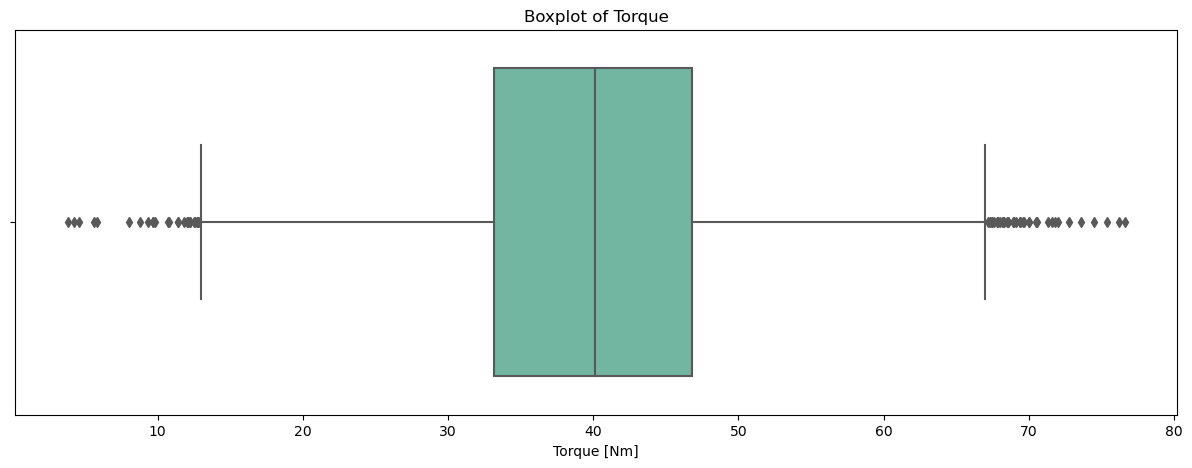

In [17]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Torque [Nm]', data = mf, palette = 'Set2')# This sets the color palette for the boxplot. The 'Set2' palette is one of the predefined palettes in Seaborn.
plt.title('Boxplot of Torque')
plt.show()

In [18]:
Q1_nm = mf.describe()['Torque [Nm]']['25%']
Q3_nm = mf.describe()['Torque [Nm]']['75%']
IQR_nm = Q3_nm - Q1_nm
UpFence_nm = Q3_nm + (1.5 * IQR_nm)
LoFence_nm = Q1_nm - (1.5 * IQR_nm)

out_nm = (mf['Torque [Nm]'] < LoFence_nm) | (mf['Torque [Nm]'] > UpFence_nm)
mf[out_nm].sort_values(by = 'Torque [Nm]')

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
1784,0,298.3,308.0,2886,3.8,57,1
463,0,297.4,308.7,2874,4.2,118,1
50,0,298.9,309.1,2861,4.6,143,1
847,0,296.4,307.4,2833,5.6,213,1
4296,0,301.8,310.2,2825,5.8,215,1
...,...,...,...,...,...,...,...
6525,0,301.1,310.4,1312,73.6,49,1
1324,1,298.8,310.1,1243,74.5,194,1
9084,0,297.2,307.9,1326,75.4,172,1
880,1,295.8,306.3,1235,76.2,89,1


In [19]:
print(f"Outliers of 'Torque [Nm]' column is above {UpFence_nm} .")
print(f"Outliers of 'Torque [Nm]' column is below {LoFence_nm} .")
print(f"Total data which counted as an outliers is {len(mf[out_nm].sort_values(by = 'Torque [Nm]'))} of {len(mf)} rows.")
print(f"It's{(len(mf[out_nm]) ) / len(mf) * 100 : .2f}% from the entire rows.")

Outliers of 'Torque [Nm]' column is above 67.19999999999999 .
Outliers of 'Torque [Nm]' column is below 12.800000000000011 .
Total data which counted as an outliers is 69 of 10000 rows.
It's 0.69% from the entire rows.


# Target Column Data Distribution

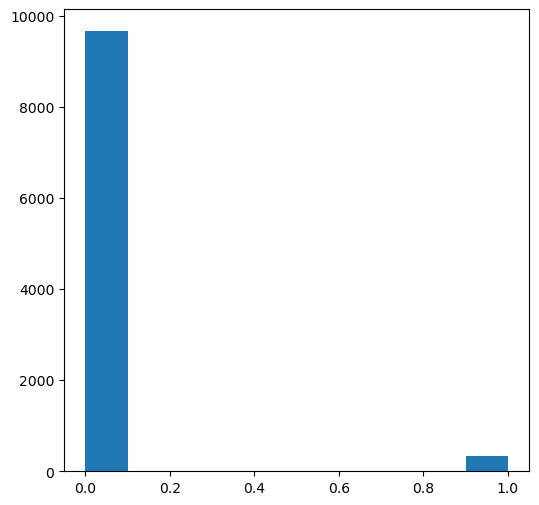

In [20]:
plt.figure(figsize=(6,6))
plt.hist(mf['Machine failure'] );

# Distribution of Features of Data

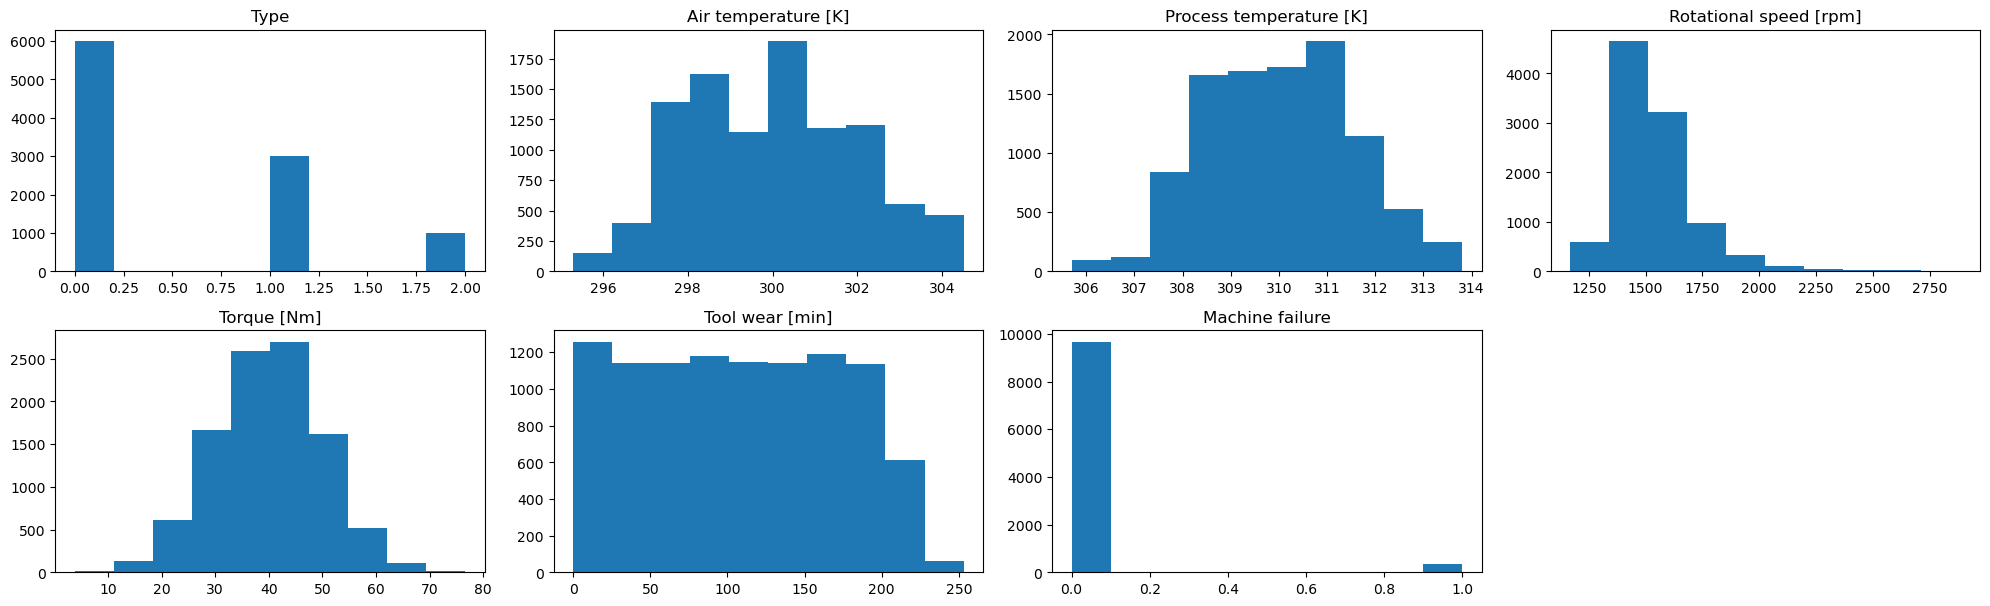

In [21]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(mf):
                     plt.subplot(10,4,i+1)
                     plt.hist(mf[variable])
                     plt.tight_layout()
                     plt.title(variable)

In [22]:
mf.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


# Data Sampling

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# we have done the Data Sampling to part the data into train and test
# test size is 0.2 , it means Train data is 80% and Test Data is 20%.
mf_train,mf_test = train_test_split(mf , test_size=0.2)

In [25]:
mf_train_x = mf_train.iloc[: , 0:6]
mf_train_y = mf_train.iloc[:,6]

mf_test_x = mf_test.iloc[: , 0:6]
mf_test_y = mf_test.iloc[:,6]

In [26]:
print(mf_train_x.shape , mf_train_y.shape)

(8000, 6) (8000,)


In [27]:
print(mf_test_x.shape ,mf_test_y.shape)

(2000, 6) (2000,)


# Logistic_Regression
Target Variable is Binary so, i have used Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression( )
logreg.fit(mf_train_x,mf_train_y)

LogisticRegression()

In [30]:
pred_log = logreg.predict(mf_test_x)
pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
con_log = confusion_matrix(mf_test_y , pred_log)
con_log

array([[1925,    7],
       [  55,   13]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [34]:
accuracy_score(mf_test_y , pred_log)

0.969

In [35]:
precision_score(mf_test_y , pred_log)

0.65

In [36]:
recall_score(mf_test_y , pred_log)

0.19117647058823528

# Decision_Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [38]:
dt.fit(mf_train_x,mf_train_y)

DecisionTreeClassifier()

In [39]:
pred_dt = dt.predict(mf_test_x)

In [40]:
con_dt = confusion_matrix(mf_test_y , pred_dt)
con_dt

array([[1907,   25],
       [  20,   48]], dtype=int64)

In [41]:
accuracy_score(mf_test_y , pred_dt)

0.9775

In [42]:
precision_score(mf_test_y , pred_dt)

0.6575342465753424

In [43]:
recall_score(mf_test_y , pred_dt)

0.7058823529411765

# Random_forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000,max_depth = 15,max_features = 'log2',random_state=48)

In [45]:
rfc.fit(mf_train_x,mf_train_y)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=1000,
                       random_state=48)

In [46]:
pred_rfc  = rfc.predict(mf_test_x)

In [47]:
con_rfc = confusion_matrix(mf_test_y , pred_rfc)
con_rfc

array([[1924,    8],
       [  23,   45]], dtype=int64)

In [48]:
accuracy_score(mf_test_y , pred_rfc)

0.9845

In [49]:
precision_score(mf_test_y , pred_rfc)

0.8490566037735849

In [50]:
recall_score(mf_test_y , pred_rfc)

0.6617647058823529

# naive_bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [52]:
nb.fit(mf_train_x,mf_train_y)

MultinomialNB()

In [53]:
pred_nb = nb.predict(mf_test_x)

In [54]:
con_nb = confusion_matrix(mf_test_y , pred_nb)
con_nb

array([[1278,  654],
       [  21,   47]], dtype=int64)

In [55]:
accuracy_score(mf_test_y , pred_nb)

0.6625

In [56]:
precision_score(mf_test_y , pred_nb)

0.06704707560627675

In [57]:
recall_score(mf_test_y , pred_nb)

0.6911764705882353

# Gradient_boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gb= GradientBoostingClassifier()

In [60]:
gb.fit(mf_train_x , mf_train_y)

GradientBoostingClassifier()

In [61]:
pred_gb = gb.predict(mf_test_x)

In [62]:
con_gb = confusion_matrix(mf_test_y , pred_gb)
con_gb

array([[1926,    6],
       [  23,   45]], dtype=int64)

In [63]:
accuracy_score(mf_test_y , pred_gb)

0.9855

In [64]:
precision_score(mf_test_y , pred_gb)

0.8823529411764706

In [65]:
recall_score(mf_test_y , pred_gb)

0.6617647058823529

In [80]:
Comparison_Frame={"Model Name":["Accuracy","Precision","TPR/Recall"],
                  "Logistic Reg":[0.96,0.65,0.21],
                  "Decision Tree":[0.97,0.65,0.70],
                  "Random Forest":[0.98,0.90,0.69],
                  "Naive Bayes":[0.66,0.06,0.69],
                  "Gradient Boosting":[0.98,0.88,0.66]
                 }

In [81]:
Comparison_Frame = pd.DataFrame(Comparison_Frame)
Comparison_Frame

,Model Name,Logistic Reg,Decision Tree,Random Forest,Naive Bayes,Gradient Boosting
0,Accuracy,0.96,0.97,0.98,0.66,0.98
1,Precision,0.65,0.65,0.90,0.06,0.88
2,TPR/Recall,0.21,0.70,0.69,0.69,0.66


# Result


 (1) we have used Logistic Regression, Desicion Tree, Random Forest, Naive Bayes, Gradient Boost Models.
 (2) Out of all model Random Forest gives the better Accuracy 0.98 , precision 0.90 and Recall 0.69.
 (3) so we can say that , Random Forest is the best fit model out of all models.